### Bell Test on Real Quantum Hardware
This notebook calculates the result of the Bell Test on the SpinQ Gemini Mini 2-qubit quantum computer. Please refer to this Notion Page: https://www.notion.so/lanabozanic/2-Qubit-NMR-Quantum-Computer-Guide-3a48ff5d0127444b813376c227e18d85?pvs=4

In [203]:
import numpy as np
import math

The data is formulated by describing the probabilities of measuring $|00\rangle,|10\rangle,|01\rangle,|11\rangle$ 

For each pair of observables, $\langle A_0 \otimes B_0 \rangle,\langle A_1 \otimes B_0 \rangle,\langle A_0 \otimes B_1 \rangle,\langle A_1 \otimes B_1 \rangle$

For example, the array below describes a perfect, noiseless bell test on the state  $\dfrac{|00\rangle + |11\rangle}{\sqrt2}$

In [221]:
simulationBellState1=[[73223,426776,426776,73223],[426776,73223,73223,426776],[426776,73223,73223,426776],[426776,73223,73223,426776]]

Real data taken from SpinQ's machine can be found below. For this set, we used the built-in bell test circuits 

(With obseravbles $A_0 = X, A_1 = Y, B_0 = (X+Y)/2, B_1=(X-Y)/2$)



In [233]:
realhardware_XY=[[0,3989898,529312,71697], [250000, 132098, 249999, 367901], [309826, 15208, 190173, 484791], [46125, 0,0,573874]]
realhardware_XY2 =[[0,0.426179, 0.496833, 0.076986], [0.280296, 0.019552, 0.23579, 0.46436], [0.301346, 0.068455, 0.135564, 0.494632], [0.407092, 0, 0.088186, 0.50472]]

We also did the bell test with observables $A_0 = Z, A_1 = X, B_0 = (Z+X)/2, B_1=(Z-X)/2$) 

In [234]:
realhardware_XZ = [[0.329255, 0, 0.148068, 0.521883],[0.348826, 0.044663, 0.178636, 0.427874], [0.534544, 0.078076, 0, 0.387379], [0.181535, 0.50466, 0.313095, 0]]

We define the function to find the expectation value of a given pair of observables by calculating 

$$E =  \dfrac{N_{00} - N_{10} - N_{01} + N_{11}}{N_{00} + N_{10} + N_{01} + N_{11}}$$.

We calculate the total expectation value by adding up all absolute value of all expectation values (we can do this because only one of  $\langle A_0 \otimes B_0 \rangle$ or  $\langle A_1 \otimes B_1 \rangle$ will have opposite sign to all other expectation values, so for simplicity we take the asbolute value of each expectation value to find CSHS equality violations.

In [224]:
def get_E(a,b,c,d):
    E = (a - b - c + d) / (a + b + c + d)
    return E

def expectation(data):
    S = 0
    for i in range(len(data)):
        E = get_E(data[i][0], data[i][1], data[i][2], data[i][3])
        S += abs(E)
    print('S =',S)

Now we can find the expectation value of any dataset. For example, the ideal bell test on $\dfrac{|00\rangle + |11\rangle}{\sqrt2}$

In [225]:
expectation(simulationBellState1)

S = 2.828429656859314


Which is $2\sqrt2$, the maximum expectation valued allowed (which makes sense, because this state is maximally entangled)

For experiments on the real quantum hardware we find:

In [235]:
expectation(realhardware_XY)

S = 2.793807299224091


In [236]:
expectation(realhardware_XY2)

S = 2.750931093822963


In [238]:
expectation(realhardware_XZ)

S = 2.7375501155686224


These all violate the bell inequality!

### Data visualization

If you want to visualize the result of any experiment, you can use the code below:

In [229]:
import numpy as np
import matplotlib.pyplot as plt


def create_barplot(data):
    bardata={"00": data[0],"10": data[1],"01": data[2],"11": data[3],}
    courses = list(bardata.keys())
    values = list(bardata.values())
    plt.style.use("seaborn")
  
    fig = plt.figure(figsize = (8, 5))

    # creating the bar plot
    plt.bar(courses, values, color ='lightseagreen',
            width = 0.3)

    plt.xlabel("Result", fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.ylabel("Probability", fontsize=16)
    plt.title("Result", fontsize=16)

    plt.show()

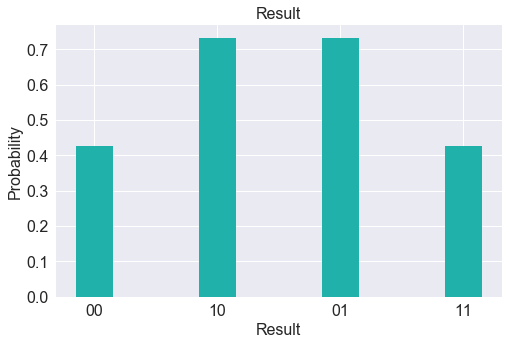

In [230]:
create_barplot(simulation[1])